### Ejemplo de KNN

### -El siguiente ejemplo se basa en estos 4 links:

#### 1) https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75
#### 2) https://github.com/Msanjayds/Scikit-learn/blob/master/KNN%20on%20Iris%20Datset.ipynb
#### 3) http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/tutorial/plot_knn_iris.html
#### 4) https://gist.github.com/netj/8836201 --> DS de plantas.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

### Cargamos el Dataset

In [4]:
#Cargamos el dataset de iris que ya viene de sklearn:
iris = load_iris()
#Vemos que :
    #Tenemos 4 feautures (longitud del cépalo, ancho del cepalo, longiutd del pétalo y ancho del pétalo).
    #Y tenemos 3 clases/tipos de plantas de acuerdo a los 4 features anteriores: setosa, versicolor o virginica. 
        #--> Esto es porque ya está clasificado el DS, por esto utilizamos un algoritmo SUPERVISADO: esta clasificación es de acuerdo a las 4 features.
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
#Representamos mediante enteros, a cada clase 0 = setosa, 1=versicolor, 2=virginica
print(iris.target) ##Target es una FUNCIÓN que lo que hace es ponerle a todas las "setosas" el valor 0, versicolor 1 y virginica 2.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
#HACER ESTO!!!! Transformar de array a DF. Y abajo asignarlo a X. 
df = iris.data  #En la función DATA tenemos todas las feautures de cada muestra.
df.head(10)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [8]:
#Entonces separamos los datos y nuestro target: 
# Datos de cada iris
X = iris.data
# Datos de cada clase
y = iris.target

X 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Entrenamos al algoritmo de KNN

In [73]:
#Entrenamiento... separamos 20% test y 80% para entrenamiento:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [74]:
#Como vimos previamente, dependiendo del valor de K el algoritmo se compartaba de mejor o peor manera. 
#Vamos a realizar un barrido para los distintos valores de K (del 1 al 25).
#Y así, para cada uno de estos valores de K vamos a entrenar al algoritmo y así vamos a obtener la exactitud/score del algoritmo:

k_range = range(1,25) #Valores de K (1-25)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k) #Llamamos al modelo de clasificación (KNN) y le pasamos cada valor de K. 
        knn.fit(X_train,y_train) #Se va a entrenar al algorimo para ese K con los x_train e Y_train que elegimos previamente.
        y_pred=knn.predict(X_test) #Y ahora hacemos una predicción con los X_Test... lo mismo que haciamos con RL.
        scores[k] = metrics.accuracy_score(y_test,y_pred) #Después calculamos y guardamos el score de esa predicción con ese valor de K.
        scores_list.append(scores[k]) #Y esa predicción la metemos en una lista.

Text(0,0.5,'Testing Accuracy')

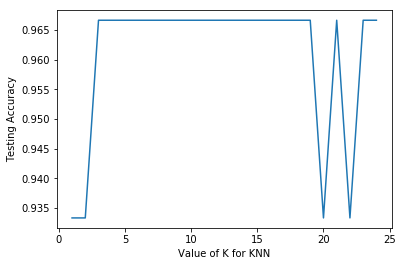

In [75]:
#Ahora graficamos y vemos la relación entre los K y la exactitud/score del algoritmo:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [76]:
#Así, arriba vemos que para valores de K entre 3 aprox. y 19 el score dá casi 0,97.
#Luego si elegimos un K mayor a 19 nuestro algoritmo se vuelve inestable... un K mayor a 19 NO es recomendable.

In [77]:
#Ahora vamos a probar con un rango de K de 1 a 100 haciendo lo mismo que hicimos antes solo que cambiando el rango:

k_range_2 = range(1,100) #Valores de K (1-100)
scores_2 = {}
scores_list_2 = []
for k in k_range_2:
        knn = KNeighborsClassifier(n_neighbors=k) #Llamamos al modelo de clasificación (KNN) y le pasamos cada valor de K. 
        knn.fit(X_train,y_train) #Se va a entrenar al algorimo para ese K con los x_train e Y_train que elegimos previamente.
        y_pred=knn.predict(X_test) #Y ahora hacemos una predicción con los X_Test... lo mismo que haciamos con RL.
        scores_2[k] = metrics.accuracy_score(y_test,y_pred) #Después calculamos y guardamos el score de esa predicción con ese valor de K.
        scores_list_2.append(scores_2[k]) #Y esa predicción la metemos en una lista.

Text(0,0.5,'Testing Accuracy')

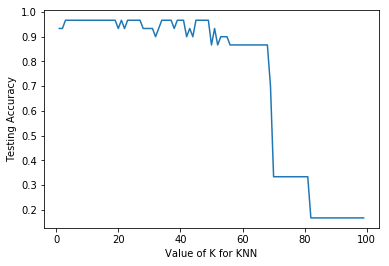

In [78]:
#Gracifamos nuevamente y vemos la relación entre los K y la exactitud/score del algoritmo:
plt.plot(k_range_2,scores_list_2)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [79]:
#Ahora tenemos un "rango mayor" del que vimos anteriormente del 1-25... ahora vemos
#nuevamente que del 19 en adelante (hasta el 55 aprox.) el algoritmo se vuelve muy inestable y poco fiable. 
#Pero después de 55 vemos que la eficiencia (accuracy) de nuestro algoritmo cayó al 0,87 aprox (mucho menos que del 1 al 19).
#Entonces en este caso si elegimos valores de K muy grandes empieza a clasificar cualquier cosa.

#Entonces, de esta manera podemos garantizar viendo el rango de K posible si el algoritmo funcionará bien o no.

### Entrenamos al algoritmo de KNN con un K óptimo (K=10)

In [80]:
#Como vimos que para un K 1 hasta 19 nuestro modelo predecirá bien... entonces
#ELEGIMOS UN K=10.

k_Optimo=10
knn = KNeighborsClassifier(n_neighbors=k_Optimo) #Le asignamos este k=10.
knn.fit(X_train,y_train) #Se va a entrenar al algorimo para ese K=10 con los x_train e Y_train que elegimos previamente.
y_pred=knn.predict(X_test) #Y ahora hacemos una predicción con los X_Test.
score = metrics.accuracy_score(y_test,y_pred) #Cálculo del score para k=10.

### Realizamos predicciones con un K óptimo (K=10)

In [81]:
#Ahora vamos a realizar predicciones con este K óptimo...

#Creamos un diccionario donde tenemos que setosa es 0, versicolor es 1 y virginica es 2:
dicClasses = {0:'setosa',1:'versicolor',2:'virginica'}

#Antes estabamos acostumbrados a usar el x_test para predecir con esto... ahora vamos a tomar 
#valores que NO estan en nuestro DS ni en nuestro x_test para predecir el tipo de planta:
x_new = [[3,4,5,2],
         [5,4,2,2],
         [5,3.5,1.2,0.1]]

#Este X_new son valores que nosotros le ponemos, para el 1er caso 3 de longitud del cépalo, 4 de ancho del cepalo, 5 de longiutd del pétalo y 2 de ancho del pétalo 
#Son 4 coordenadas que nos definen un punto. 
#Agregué el 3er vector para que tenga un valor MUY similar a la planta setosa de nuestra 1ra fila del DS (5.1; 3.5; 1.4; 0.2)
#para poder comparar esta predicción con la predicción de un k NO óptimo.

#De esta manera le pasamos una planta que NO sabemos que categoría es y el algoritmo ya previamente entrenado predecirá cual planta piensa que es:
y_predict = knn.predict(x_new)

print(dicClasses[y_predict[0]]) #La 1era nos dice que es versicolor.
print(dicClasses[y_predict[1]]) #La 2da nos dice que es setosa.
print(dicClasses[y_predict[2]]) #La 3ra nos dice que es setosa. BIEN, como esperabamos.

versicolor
setosa
setosa


### Entrenamos al algoritmo de KNN con un K NO óptimo (K=85)

In [82]:
#Elegimos un k=85 (donde nuestro modelo en teoría clasificará mal) para evaluar si nos dá diferentes resultados.

k_No_Optimo=85
knn_bad = KNeighborsClassifier(n_neighbors=k_No_Optimo) #Le asignamos este k=85.
knn_bad.fit(X_train,y_train) #Se va a entrenar al algorimo para ese K=85 con los x_train e Y_train que elegimos previamente.
y_pred=knn_bad.predict(X_test) #Y ahora hacemos una predicción con los X_Test.
score = metrics.accuracy_score(y_test,y_pred) #Cálculo del score para k=85.

### Realizamos predicciones con un K NO óptimo (K=85)

In [83]:
#Usamos el x_new y el dicClasses que definimos anteriormente en K=10... esto no cambia.     

y_predict_bad = knn_bad.predict(x_new)

print(dicClasses[y_predict_bad[0]]) #La 1era nos dice que es versicolor.
print(dicClasses[y_predict_bad[1]]) #La 2da nos dice que es versicolor (seguramente esté mal).
print(dicClasses[y_predict_bad[2]]) #La 3ra nos dice que es versicolor (como vimos anteriormente en este vector agregamos valores MUY similares a la planta setosa de nuestra 1ra fila del DS (5.1; 3.5; 1.4; 0.2) )
                                    # -->por lo que si el algoritmo funcionaría bien nos predeciría que es setosa (como cuando pusimos K=10)... pero en este caso nod ice que es versicolor --> por esto con un modelo con K=85 nuestro algoritmo predice mal, NO es fiable.

versicolor
versicolor
versicolor


In [84]:
#Conclusión: A KNN le pasamos nuestro algoritmo ya etiquetado y en base a esto encontramos el mejor valor de K
#para que pueda realizar la clasificación lo mejor posible. Si para nuestro K tenemos un buen score entonces nuestro algoritmos
#predecirá bien y podremos utilizar este valor de K; en caso contrario (al elegir un K NO óptimo) nuestro algoritmo no predecirá para nada bien. 